In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터 전처리

In [ ]:
#import data
from google.colab import files 
uploaded = files.upload()

Saving x_and_y_before_regression_final.csv to x_and_y_before_regression_final.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['x_and_y_before_regression_final.csv']))

In [ ]:
df.head()

,Unnamed: 0,Age,Gender,onset_site,onset_delta,diag_delta,diag_minus_onset,mean_alsfrs_total,alsfrs_total_slope,fvc_slope,fvc_mean,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,ALSFRS_slope
0,0,52.0,0.0,0.0,-501.0,-302.0,199.0,30.250000,-0.009689,0.284522,86.424228,4.00,4.000000,4.00,3.5,2.0,2.250000,3.5,2.000000,1.000000,4.00,8.0,14.250000,0.000000,0.000000,0.000000,0.016393,0.0,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,-0.341760
1,1,65.0,0.0,1.0,-1023.0,-44.0,979.0,28.666667,0.002114,-0.583333,73.500000,1.00,1.333333,2.00,4.0,4.0,3.333333,4.0,3.333333,2.666667,3.00,3.0,21.333333,-0.010989,-0.010989,0.000000,0.000000,0.0,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989,-0.965608
2,2,66.0,0.0,1.0,-550.0,-462.0,88.0,32.000000,-0.043752,-0.057374,92.885179,0.75,2.750000,0.75,4.0,4.0,4.000000,4.0,4.000000,4.000000,3.75,1.5,24.000000,0.000000,-0.014493,-0.014493,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.014493,-0.014493,0.000000,-0.569600
3,3,41.0,1.0,2.0,-570.0,-511.0,59.0,16.500000,-0.104167,0.000000,71.000000,2.50,3.000000,3.00,1.5,1.0,1.000000,0.5,0.500000,0.000000,3.50,5.5,4.500000,-0.020833,-0.041667,0.000000,-0.020833,0.0,0.000000,-0.020833,-0.020833,0.000000,0.020833,-0.020833,-0.062500,-1.183528
4,4,63.0,1.0,2.0,-365.0,-209.0,156.0,30.000000,0.000000,-0.235294,114.000000,4.00,4.000000,4.00,3.0,3.0,2.000000,3.0,3.000000,1.000000,3.00,8.0,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,-0.598361


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
y = df[['ALSFRS_slope']]
X= df.drop(columns=['ALSFRS_slope'])

In [ ]:
X = X.astype('float64')

In [ ]:
X.isnull().sum().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_cat = X['Gender']
X.drop(columns = ['Gender'], inplace = True)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X

,Age,onset_site,onset_delta,diag_delta,diag_minus_onset,mean_alsfrs_total,alsfrs_total_slope,fvc_slope,fvc_mean,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor
0,-0.270588,-1.902410,0.237813,-0.246492,-0.538994,-0.007617,0.125969,1.159389,0.083434,0.781623,0.648104,0.707717,0.470343,-0.699635,-0.333181,0.403936,-0.824303,-0.797046,0.639747,0.802329,-0.447308,0.044420,0.063843,0.063517,1.131431,0.145931,-0.839430,0.127105,0.128340,0.182042,0.046670,0.093403,-0.021742
1,0.885378,-0.616471,-1.467130,0.892301,2.728775,-0.311192,0.288795,-1.704213,-0.816888,-2.412845,-2.819940,-2.266642,1.003393,1.113081,0.783042,0.983781,0.653304,0.450311,-1.105353,-2.513303,1.051062,-0.501582,-0.689757,0.063517,0.123118,0.145931,-0.502019,-0.078042,0.921033,0.678877,0.046670,-0.472249,0.485666
2,0.974299,-0.616471,0.077771,-0.952721,-1.004023,0.327913,-0.343925,0.031257,0.533514,-2.679051,-0.977542,-4.125617,1.003393,1.113081,1.469948,0.983781,1.392108,1.448196,0.203472,-3.507993,1.615155,0.044420,-0.930035,-0.936469,0.123118,0.145931,0.184050,-0.495174,0.128340,0.182042,-0.840691,-0.652601,0.282035
3,-1.248712,0.669468,0.012447,-1.169003,-1.125517,-2.643923,-1.177361,0.220570,-0.991042,-0.815611,-0.652413,-0.779463,-1.661854,-1.605993,-1.621130,-3.075137,-2.486612,-1.545459,-0.232803,-0.855487,-2.509771,-0.990709,-2.793556,0.063517,-1.158279,0.145931,0.184050,-1.285988,-1.374473,0.182042,1.322251,-0.978978,-0.876114
4,0.707537,0.669468,0.682013,0.164003,-0.719140,-0.055550,0.259636,-0.555813,2.004405,0.781623,0.648104,0.707717,-0.062706,0.206723,-0.590770,-0.175910,0.283902,-0.797046,-1.105353,0.802329,-0.288657,0.044420,0.063843,0.063517,0.123118,0.145931,0.184050,0.621268,0.128340,0.182042,0.046670,0.093403,0.282035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,-1.070872,0.669468,-0.323969,-0.206767,0.219296,-1.445602,-0.201734,-1.502366,-0.096244,-0.283200,0.322975,-0.779463,-1.128805,-1.379404,-1.621130,-1.335601,-0.824303,-0.984149,0.639747,-0.523924,-1.557865,0.044420,-0.815357,0.063517,0.123118,-0.626036,0.184050,-0.008520,0.128340,-0.397599,0.046670,0.093403,-0.193103
1646,1.329980,-0.616471,0.789797,0.287593,-0.740088,-0.151415,-0.983021,-0.361591,0.300733,-2.146639,-2.603187,-1.523052,1.003393,-0.019867,0.954768,0.983781,1.115056,0.699782,-0.669078,-2.015958,0.980551,-0.655385,-1.867920,-0.908300,0.123118,-0.702145,-0.695278,0.039460,-0.887646,0.182042,0.909035,-1.356577,-0.500939
1647,-0.804110,-0.616471,0.979235,0.150761,-1.112948,-1.876997,-0.504942,1.010154,-0.005838,-1.880434,-0.327284,-0.779463,-0.862280,-1.605993,-2.136309,-1.045678,-0.824303,-0.984149,0.639747,-1.518613,-1.610749,0.044420,0.870637,-0.748236,-2.047719,0.145931,0.184050,-0.048597,0.128340,-0.349864,0.046670,-0.512177,-0.807988
1648,0.618617,0.669468,0.933508,0.600982,-0.626972,1.094838,0.259636,0.631570,0.221559,0.781623,0.648104,0.707717,1.003393,1.113081,0.439589,0.403936,0.283902,0.325575,0.639747,0.802329,0.769016,0.044420,0.063843,0.063517,0.123118,0.145931,0.184050,-0.495174,0.128340,0.818831,0.046670,0.093403,0.282035


In [ ]:
X = pd.concat([X_cat,X], axis=1)
X

,Gender,Age,onset_site,onset_delta,diag_delta,diag_minus_onset,mean_alsfrs_total,alsfrs_total_slope,fvc_slope,fvc_mean,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor
0,0.0,-0.270588,-1.902410,0.237813,-0.246492,-0.538994,-0.007617,0.125969,1.159389,0.083434,0.781623,0.648104,0.707717,0.470343,-0.699635,-0.333181,0.403936,-0.824303,-0.797046,0.639747,0.802329,-0.447308,0.044420,0.063843,0.063517,1.131431,0.145931,-0.839430,0.127105,0.128340,0.182042,0.046670,0.093403,-0.021742
1,0.0,0.885378,-0.616471,-1.467130,0.892301,2.728775,-0.311192,0.288795,-1.704213,-0.816888,-2.412845,-2.819940,-2.266642,1.003393,1.113081,0.783042,0.983781,0.653304,0.450311,-1.105353,-2.513303,1.051062,-0.501582,-0.689757,0.063517,0.123118,0.145931,-0.502019,-0.078042,0.921033,0.678877,0.046670,-0.472249,0.485666
2,0.0,0.974299,-0.616471,0.077771,-0.952721,-1.004023,0.327913,-0.343925,0.031257,0.533514,-2.679051,-0.977542,-4.125617,1.003393,1.113081,1.469948,0.983781,1.392108,1.448196,0.203472,-3.507993,1.615155,0.044420,-0.930035,-0.936469,0.123118,0.145931,0.184050,-0.495174,0.128340,0.182042,-0.840691,-0.652601,0.282035
3,1.0,-1.248712,0.669468,0.012447,-1.169003,-1.125517,-2.643923,-1.177361,0.220570,-0.991042,-0.815611,-0.652413,-0.779463,-1.661854,-1.605993,-1.621130,-3.075137,-2.486612,-1.545459,-0.232803,-0.855487,-2.509771,-0.990709,-2.793556,0.063517,-1.158279,0.145931,0.184050,-1.285988,-1.374473,0.182042,1.322251,-0.978978,-0.876114
4,1.0,0.707537,0.669468,0.682013,0.164003,-0.719140,-0.055550,0.259636,-0.555813,2.004405,0.781623,0.648104,0.707717,-0.062706,0.206723,-0.590770,-0.175910,0.283902,-0.797046,-1.105353,0.802329,-0.288657,0.044420,0.063843,0.063517,0.123118,0.145931,0.184050,0.621268,0.128340,0.182042,0.046670,0.093403,0.282035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,1.0,-1.070872,0.669468,-0.323969,-0.206767,0.219296,-1.445602,-0.201734,-1.502366,-0.096244,-0.283200,0.322975,-0.779463,-1.128805,-1.379404,-1.621130,-1.335601,-0.824303,-0.984149,0.639747,-0.523924,-1.557865,0.044420,-0.815357,0.063517,0.123118,-0.626036,0.184050,-0.008520,0.128340,-0.397599,0.046670,0.093403,-0.193103
1646,1.0,1.329980,-0.616471,0.789797,0.287593,-0.740088,-0.151415,-0.983021,-0.361591,0.300733,-2.146639,-2.603187,-1.523052,1.003393,-0.019867,0.954768,0.983781,1.115056,0.699782,-0.669078,-2.015958,0.980551,-0.655385,-1.867920,-0.908300,0.123118,-0.702145,-0.695278,0.039460,-0.887646,0.182042,0.909035,-1.356577,-0.500939
1647,0.0,-0.804110,-0.616471,0.979235,0.150761,-1.112948,-1.876997,-0.504942,1.010154,-0.005838,-1.880434,-0.327284,-0.779463,-0.862280,-1.605993,-2.136309,-1.045678,-0.824303,-0.984149,0.639747,-1.518613,-1.610749,0.044420,0.870637,-0.748236,-2.047719,0.145931,0.184050,-0.048597,0.128340,-0.349864,0.046670,-0.512177,-0.807988
1648,1.0,0.618617,0.669468,0.933508,0.600982,-0.626972,1.094838,0.259636,0.631570,0.221559,0.781623,0.648104,0.707717,1.003393,1.113081,0.439589,0.403936,0.283902,0.325575,0.639747,0.802329,0.769016,0.044420,0.063843,0.063517,0.123118,0.145931,0.184050,-0.495174,0.128340,0.818831,0.046670,0.093403,0.282035


In [ ]:
y

,ALSFRS_slope
0,-0.341760
1,-0.965608
2,-0.569600
3,-1.183528
4,-0.598361
...,...
1645,-1.298932
1646,-0.569600
1647,-1.382576
1648,-0.434524


### Train/Test set 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=11)

### 모델 생성 및 학습

### (1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
fitted_model_lr = model_lr.fit(X_train, y_train)

In [ ]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,X_train)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ALSFRS_slope   R-squared (uncentered):                   0.460
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              37.98
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                   1.51e-150
Time:                        16:02:11   Log-Likelihood:                         -1446.8
No. Observations:                1320   AIC:                                      2952.
Df Residuals:                    1291   BIC:                                      3102.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Gender                           -0.8145      0.026    -31.240      0.000      -0.866      -0.763
Age                              -0.0822      0.021     -3.985      0.000      -0.123      -0.042
onset_site                        0.0159      0.022      0.730      0.466      -0.027       0.058
onset_delta                      -0.0827      0.011     -7.286      0.000      -0.105      -0.060
diag_delta                       -0.0795      0.016     -4.928      0.000      -0.111      -0.048
diag_minus_onset                  0.0306      0.015      1.978      0.048       0.000       0.061
mean_alsfrs_total                 0.0200      0.005      3.812      0.000       0.010       0.030
alsfrs_total_slope                0.0944      0.278      0.340      0.734      -0.451       0.640
fvc_slope                         0.0078      0.020      0.390      0.697      -0.031       0.047
fvc_mean                          0.0592      0.022      2.682      0.007       0.016       0.102
mean_Q1_Speech                    0.1207      0.030      4.014      0.000       0.062       0.180
mean_Q2_Salivation               -0.0452      0.032     -1.413      0.158      -0.108       0.018
mean_Q3_Swallowing               -0.0226      0.032     -0.697      0.486      -0.086       0.041
mean_Q4_Handwriting              -0.1271      0.033     -3.906      0.000      -0.191      -0.063
mean_Q5_Cutting                   0.1508      0.039      3.841      0.000       0.074       0.228
mean_Q6_Dressing_and_Hygiene     -0.1362      0.045     -3.026      0.003      -0.225      -0.048
mean_Q7_Turning_in_Bed            0.1251      0.040      3.150      0.002       0.047       0.203
mean_Q8_Walking                   0.0635      0.041      1.542      0.123      -0.017       0.144
mean_Q9_Climbing_Stairs          -0.0069      0.039     -0.178      0.858      -0.083       0.069
mean_Q10_Respiratory             -0.0525      0.023     -2.331      0.020      -0.097      -0.008
mean_Bulbar                       0.0651      0.013      5.170      0.000       0.040       0.090
mean_motor                        0.0150      0.005      2.919      0.004       0.005       0.025
slope_Q1_Speech                  -0.0393      0.034     -1.172      0.241      -0.105       0.026
slope_Q2_Salivation              -0.0170      0.060     -0.285      0.776      -0.134       0.100
slope_Q3_Swallowing               0.0292      0.028      1.039      0.299      -0.026       0.084
slope_Q4_Handwriting              0.0003      0.036      0.008      0.994      -0.071       0.071
slope_Q5_Cutting                  0.0124      0.030      0.407      0.684      -0.047       0.072
slope_Q6_Dressing_and_Hygiene     0.0372    

In [ ]:
fitted_model_lr2.params

Gender                          -0.814475
Age                             -0.082206
onset_site                       0.015859
onset_delta                     -0.082660
diag_delta                      -0.079476
diag_minus_onset                 0.030592
mean_alsfrs_total                0.019981
alsfrs_total_slope               0.094384
fvc_slope                        0.007773
fvc_mean                         0.059167
mean_Q1_Speech                   0.120657
mean_Q2_Salivation              -0.045205
mean_Q3_Swallowing              -0.022579
mean_Q4_Handwriting             -0.127103
mean_Q5_Cutting                  0.150788
mean_Q6_Dressing_and_Hygiene    -0.136237
mean_Q7_Turning_in_Bed           0.125144
mean_Q8_Walking                  0.063516
mean_Q9_Climbing_Stairs         -0.006897
mean_Q10_Respiratory            -0.052503
mean_Bulbar                      0.065072
mean_motor                       0.015004
slope_Q1_Speech                 -0.039322
slope_Q2_Salivation             -0

### (2) XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[16:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### (3) Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 모델 평가하기

### (1) MAE, RMSE, R2

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse, r-squared 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('XGB R2:',  r2_score(y_test, pred_xgb))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))
print('LR R2:',  r2_score(y_test, pred_lr))

print('RF MAE:', mean_absolute_error(y_test, pred_rf))
print('RF RMSE:', sqrt(mean_squared_error(y_test, pred_rf)))
print('RF R2:',  r2_score(y_test, pred_rf))

XGB MAE: 0.43146651855113805
XGB RMSE: 0.5411630057914282
XGB R2: 0.20372240145327902
LR MAE: 0.4639814354847872
LR RMSE: 0.5661875902035661
LR R2: 0.1283763817367547
RF MAE: 0.43990968050571805
RF RMSE: 0.5515162874588508
RF R2: 0.17296291787065932


### (2) Pearson Correlation score

In [ ]:
from scipy import stats
print("XGB PC:", stats.pearsonr(pred_xgb, y_test))
print("LR PC:", stats.pearsonr(pred_lr, y_test))
print("RF PC:", stats.pearsonr(pred_rf, y_test))

TypeError: ignored

### (3) 실제 값과 추측 값 시각화

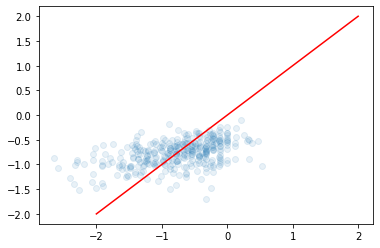

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter( y_test,pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

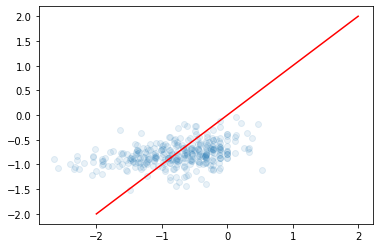

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(  y_test,pred_lr,alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

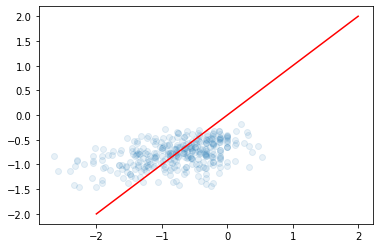

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(  y_test,pred_rf,alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

### (4) XGBoost와 Random forest 모델의 feature importance 시각화

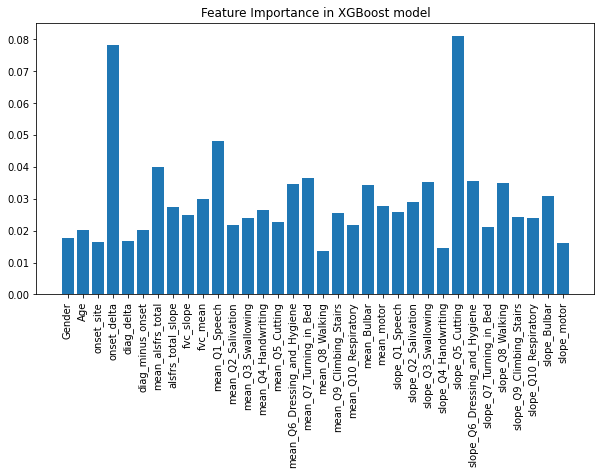

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

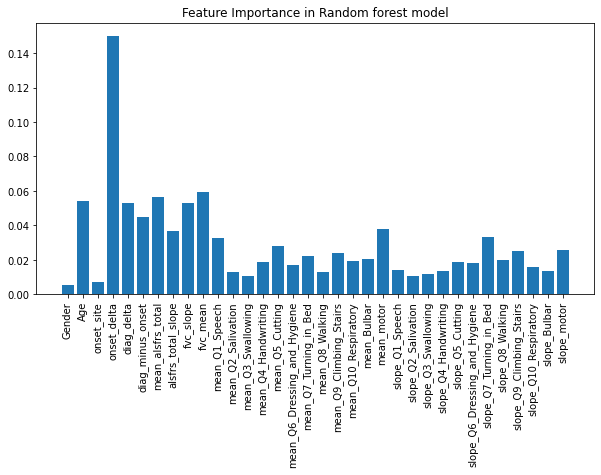

In [ ]:
fig2 = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random forest model')
plt.show()

### 5-fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [ ]:
scores_lr_r2 = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=folds)
scores_lr_rmse = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_lr_mae = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

In [ ]:
scores_xgb_r2 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=folds)
scores_xgb_rmse = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_xgb_mae = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
scores_rf_r2 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=folds)
scores_rf_rmse = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_rf_mae = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
## Summary of LR model
print("MAE of LR model in 5 fold cv:", scores_lr_mae*(-1))
print("with its mean value:", scores_lr_mae.mean()*(-1))

print("R2 of LR model in 5 fold cv:", scores_lr_r2)
print("with its mean value:", scores_lr_r2.mean())

print("RMSE of LR model in 5 fold cv:", scores_lr_rmse*(-1))
print("with its mean value:", scores_lr_rmse.mean()*(-1))

MAE of LR model in 5 fold cv: [0.45088594 0.45736746 0.39006414 0.45614288 0.50546606]
with its mean value: 0.45198529685373356
R2 of LR model in 5 fold cv: [0.0719176  0.07194768 0.15516652 0.06433321 0.07366811]
with its mean value: 0.08740662558027042
RMSE of LR model in 5 fold cv: [0.57176101 0.57662811 0.49291614 0.5918845  0.65940492]
with its mean value: 0.5785189367913023


In [ ]:
## Summary of XGB model
print("MAE of XGB model in 5 fold cv:", scores_xgb_mae*(-1))
print("with its mean value:", scores_xgb_mae.mean()*(-1))

print("R2 of XGB model in 5 fold cv:", scores_xgb_r2)
print("with its mean value:", scores_xgb_r2.mean())

print("RMSE of XGB model in 5 fold cv:", scores_xgb_rmse*(-1))
print("with its mean value:", scores_xgb_rmse.mean()*(-1))

MAE of XGB model in 5 fold cv: [0.43971375 0.4444543  0.40304902 0.4675951  0.49144697]
with its mean value: 0.44925182792742824
R2 of XGB model in 5 fold cv: [0.10501103 0.09718449 0.05898035 0.02374024 0.10477375]
with its mean value: 0.07793797214716973
RMSE of XGB model in 5 fold cv: [0.5614746  0.56873386 0.52021974 0.60458734 0.64823919]
with its mean value: 0.5806509461570709


In [ ]:
## Summary of RF model
print("MAE of RF model in 5 fold cv:", scores_rf_mae*(-1))
print("with its mean value:", scores_rf_mae.mean()*(-1))

print("R2 of RF model in 5 fold cv:", scores_rf_r2)
print("with its mean value:", scores_rf_r2.mean())

print("RMSE of RF model in 5 fold cv:", scores_rf_rmse*(-1))
print("with its mean value:", scores_rf_rmse.mean()*(-1))

MAE of RF model in 5 fold cv: [0.44046654 0.42918924 0.39612318 0.4717259  0.48749691]
with its mean value: 0.4450003520970339
R2 of RF model in 5 fold cv: [0.072649   0.16268509 0.07531597 0.00822996 0.08838107]
with its mean value: 0.08145221848931752
RMSE of RF model in 5 fold cv: [0.57034311 0.55158279 0.52088454 0.60190047 0.65248089]
with its mean value: 0.5794383606031948


In [ ]:
data = [[scores_lr_mae.mean()*(-1), scores_lr_r2.mean(),scores_lr_rmse.mean()*(-1)], 
     [scores_xgb_mae.mean()*(-1), scores_xgb_r2.mean(), scores_xgb_rmse.mean()*(-1)], 
     [scores_rf_mae.mean()*(-1), scores_rf_r2.mean(), scores_rf_rmse.mean()*(-1)]]

E = pd.DataFrame(data, columns=['MAE', 'R squared', 'RMSE'], index=['Linear Regression', 'XGBoost', 'Random Forest'])
print(E)

                        MAE  R squared      RMSE
Linear Regression  0.451985   0.087407  0.578519
XGBoost            0.449252   0.077938  0.580651
Random Forest      0.445000   0.081452  0.579438


### Repeated 5-fold cv: with visualization

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
lr_R2 = np.array([])
lr_MAE = np.array([])
lr_RMSE = np.array([])

random_num_list = [10,20,30,40,50,60,70,80,90,100]
for i in random_num_list:
    arr = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=KFold(n_splits = 5, shuffle = True, random_state = i))
    lr_R2 = np.concatenate((lr_R2, arr))

for i in random_num_list:
    arr_2 = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    lr_MAE = np.concatenate((lr_MAE, arr_2))

for i in random_num_list:
    arr_3 = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    lr_RMSE = np.concatenate((lr_RMSE, arr_3))

In [ ]:
xgb_R2 = np.array([])
xgb_MAE = np.array([])
xgb_RMSE = np.array([])

for i in random_num_list:
    arr_4 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=KFold(n_splits = 5, shuffle = True, random_state = i))
    xgb_R2 = np.concatenate((xgb_R2, arr_4))

for i in random_num_list:
    arr_5 = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    xgb_MAE = np.concatenate((xgb_MAE, arr_5))

for i in random_num_list:
    arr_6 = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    xgb_RMSE = np.concatenate((xgb_RMSE, arr_6))

[16:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
rf_R2 = np.array([])
rf_MAE = np.array([])
rf_RMSE = np.array([])

for i in random_num_list:
    arr_4 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=KFold(n_splits = 5, shuffle = True, random_state = i))
    rf_R2 = np.concatenate((rf_R2, arr_4))

for i in random_num_list:
    arr_5 = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    rf_MAE = np.concatenate((rf_MAE, arr_5))

for i in random_num_list:
    arr_6 = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=KFold(n_splits = 5, shuffle = True, random_state = i))    
    rf_RMSE = np.concatenate((rf_RMSE, arr_6))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

visualization through boxplot

In [ ]:
r2_to_plot = [lr_R2, xgb_R2, rf_R2]
mae_to_plot = [lr_MAE*(-1), xgb_MAE*(-1), rf_MAE*(-1)]
rmse_to_plot = [lr_RMSE*(-1), xgb_RMSE*(-1), rf_RMSE*(-1)]

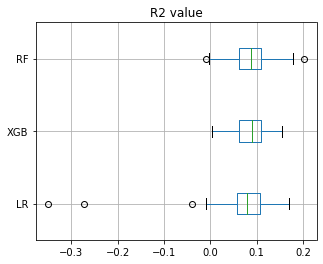

In [ ]:
df = pd.DataFrame(r2_to_plot, index=['LR', 'XGB', 'RF'])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('R2 value')

plt.show()

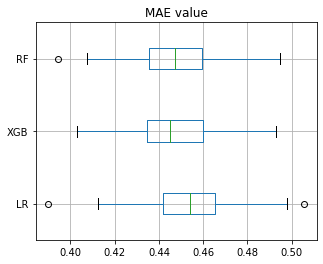

In [ ]:
df2 = pd.DataFrame(mae_to_plot, index=['LR', 'XGB', 'RF'])

df2.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('MAE value')

plt.show()

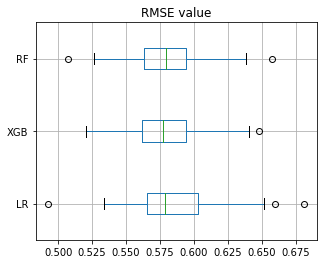

In [ ]:
df3 = pd.DataFrame(rmse_to_plot, index=['LR', 'XGB', 'RF'])

df3.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.title('RMSE value')

plt.show()

###Summary

01. Test vs Pred

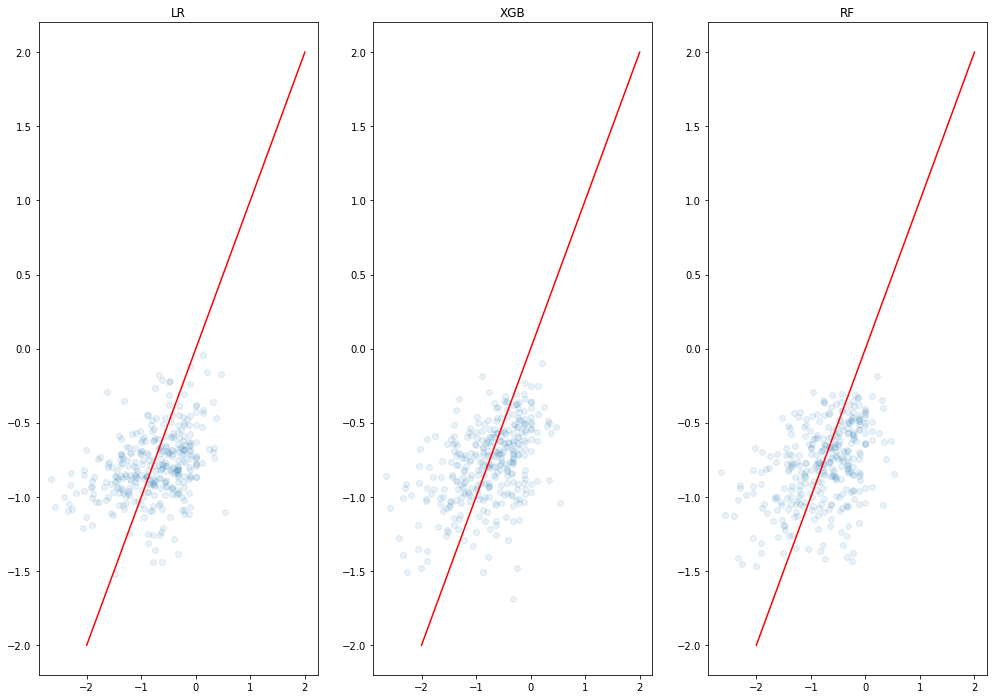

In [ ]:
# y_test vs. pred Scatter plot
plt.figure(figsize=(17, 12))

plt.subplot(1,3,1)
plt.scatter( y_test,pred_lr, alpha=0.1)
plt.title('LR')
plt.plot([-2, 2], [-2,2], 'r-')

plt.subplot(1,3,2)
plt.scatter( y_test,pred_xgb, alpha=0.1)
plt.title('XGB')
plt.plot([-2, 2], [-2,2], 'r-')

plt.subplot(1,3,3)
plt.scatter( y_test,pred_rf, alpha=0.1)
plt.title('RF')
plt.plot([-2, 2], [-2,2], 'r-')

02. Evaluation

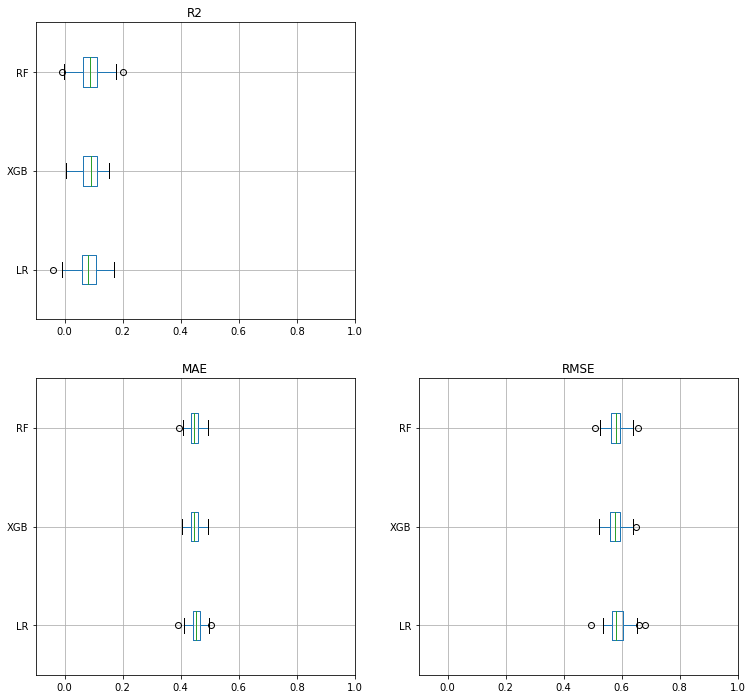

In [ ]:
# Compare in the same frame
plt.figure(figsize=(15, 12))

plt.subplot(221)
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlim(-0.1, 1)
plt.title('R2')

plt.subplot(223)
df2.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlim(-0.1, 1)
plt.title('MAE')

plt.subplot(224)
df3.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.xlim(-0.1, 1)
plt.title('RMSE')

plt.show()